1) Load in the dataset https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv into a pandas dataframe

In [412]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics
from ggplot import *

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import cross_val_score

In [386]:
df=pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv')
del df['Unnamed: 0']
df.head(5)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


2) Convert default and student to categorical variables.

In [387]:
df = df.replace("No",0).replace("Yes",1)
df.head(5)

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color of the outcome of default labeled red if yes and blue if no.

Boxplot:

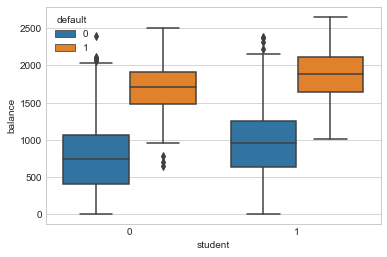

In [388]:
sns.set_style("whitegrid")
ax=sns.boxplot(x='student',y='balance',hue='default',data=df)
plt.show()

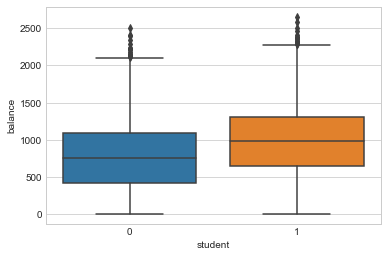

In [389]:
sns.set_style("whitegrid")
ax=sns.boxplot(x='student',y='balance',data=df)
plt.show()

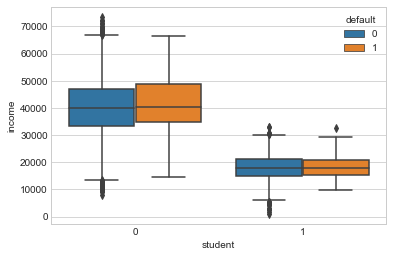

In [390]:
sns.set_style("whitegrid")
ax=sns.boxplot(x='student',y='income',hue='default',data=df)
plt.show()

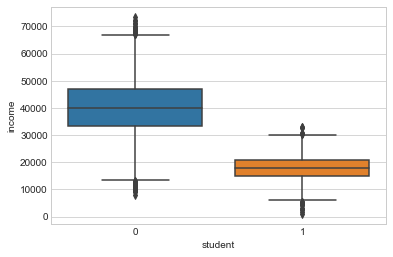

In [391]:
sns.set_style("whitegrid")
ax=sns.boxplot(x='student',y='income',data=df)
plt.show()

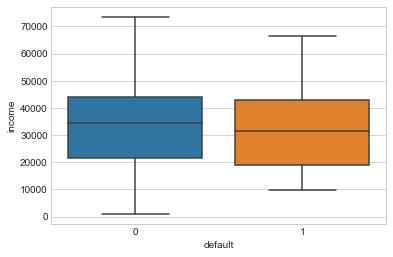

In [392]:
sns.set_style("whitegrid")
ax=sns.boxplot(x='default',y='income',data=df)
plt.show()

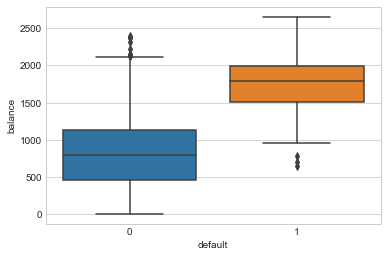

In [393]:
sns.set_style("whitegrid")
ax=sns.boxplot(x='default',y='balance',data=df)
plt.show()

Scatterplot:

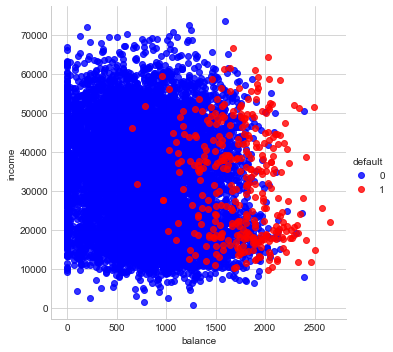

In [394]:
col_list=['blue','red']
sns.lmplot( x="balance", y="income", data=df, fit_reg=False, hue='default',palette=col_list)
plt.show()

4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley on the balance and income variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

In [413]:
dg=df.as_matrix()
dfs=df[df['student']==1]
dfs.head(5)

,default,student,balance,income
1,0,1,817.180407,12106.134700
5,0,1,919.588530,7491.558572
7,0,1,808.667504,17600.451344
10,0,1,0.000000,21871.073089
11,0,1,1220.583753,13268.562221


Model Training:

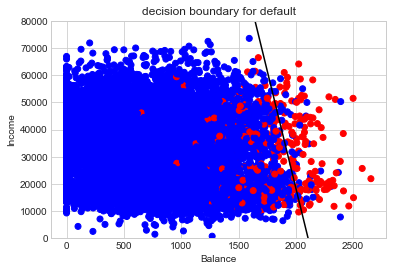

In [414]:
#data spliting
X = dfs[["balance","income"]]
y = dfs["default"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)

lmodel = LogisticRegression(penalty = "l1")
logism = lmodel.fit(X_train,y_train)

colors= {1:"red",0:"blue"}
plt.scatter(dg[:,2],dg[:,3],c = df["default"].apply(lambda x:colors[x]))
plt.title("decision boundary for default")
plt.xlabel("Balance")
plt.ylabel("Income")

#decision boundary 
b = logism.intercept_
coef = logism.coef_[0]

x = np.arange(0, 2600, 1)
y = (b + coef[0] * x) / -coef[1]
plt.plot(x, y, c='black')
plt.ylim(0, 80000)
plt.show()


AUC ROC:

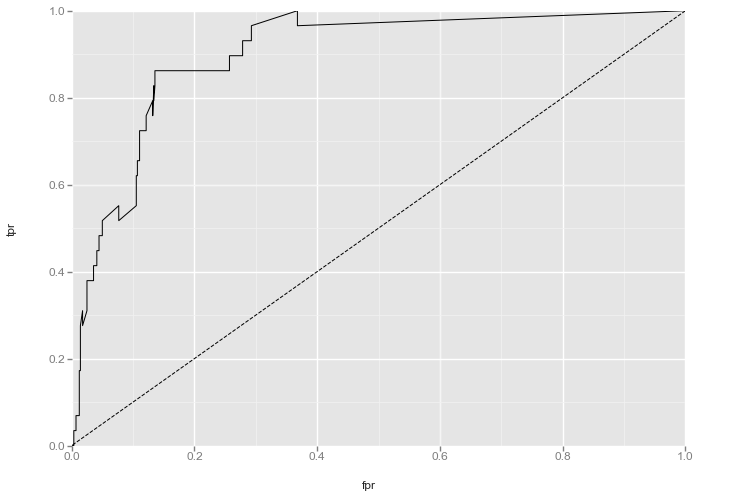

<ggplot: (-9223372036561820854)>

In [415]:
probs=lmodel.predict_proba(X_test)
prob=probs[:,1]
fpr, tpr, _= metrics.roc_curve(y_test,prob)

df3=pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df3,aes(x='fpr',y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')+\
    xlim(0,1)+ylim(0,1)


In [416]:
auc=metrics.auc(fpr,tpr)
auc

0.90806650246305409

5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking of coefficients. How does performance improve with the added variable?

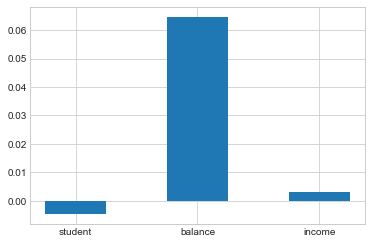

The coefficients for student, balance, and income: [-0.00483573  0.06472572  0.00296429]


In [417]:
X = df[["student","balance","income"]]
y = df["default"]
# standardize data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)
logreg = LogisticRegression(penalty = "l1")
clf = logreg.fit(X_train,y_train)

alphas = np.logspace(-5, -1, 100)
score=[]
for i in alphas:
    clf = Ridge(alpha = i)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test))
index = np.array(score).argmax()

clf = Ridge(alpha = alphas[index])
clf.fit(X_train, y_train)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar(np.arange(3), clf.coef_, 0.5)
ax.set_xticks(np.arange(3))
ax.set_xticklabels(('student', 'balance','income'))
rects = ax.patches
plt.show()
print ('The coefficients for student, balance, and income:',clf.coef_)

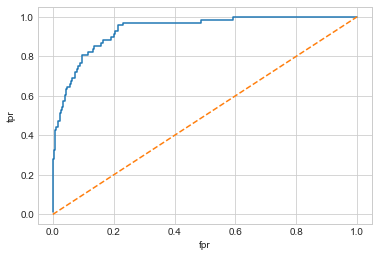

In [418]:
logr = LogisticRegression(penalty='l1', C= alpha[index])
clf = logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)

probs = clf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, probs)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],linestyle='--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [447]:
auc2=metrics.auc(fpr,tpr)
auc2

0.93215199753825828

The Roc incrased as added variable student

6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

In [ ]:
scores = cross_val_score(logr, X_train, y_train, cv=10)
print(scores)

Overall, the model in (5) is robust

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

In [446]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus


X = df[['student','balance','income']]
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

dot_data = StringIO()  
export_graphviz(clf, out_file=dot_data, feature_names=X_train.columns)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

8) Find the optimal decision tree depth and compute the AUC ROC.

Optimal Desicion Tree Depth: 3.


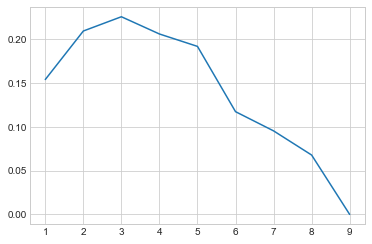

0.93215199753825828

In [448]:
train_errors=[]
test_errors=[]
scores=[]
depths = range(1,10)
for n in depths:
    regrD = DecisionTreeRegressor(max_depth=n)
    regrD.fit(X_train, y_train)
    train_errors.append(regrD.score(X_train , y_train))
    scores.append(regrD.score(X_test , y_test))
plt.plot(depths,scores)
test_errors = scores
opt = depths[np.argmax(scores)]
print("Optimal Desicion Tree Depth: {0}.".format(opt))
plt.show()

reg_opt = DecisionTreeClassifier(criterion='entropy', max_depth= opt)
reg_opt.fit(X_train,y_train)
probas_ = reg_opt.predict_proba(X_test)    
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc_tree = metrics.auc(fpr,tpr)
roc_auc_tree